# MNIST Digit Classification with Multilayer Perceptron (MLP)

In this notebook, we will create a simple Multilayer Perceptron (MLP) model using TensorFlow to classify handwritten digits from the famous MNIST dataset. The MNIST dataset consists of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

Our MLP model will be a fully connected neural network model, meaning that every neuron in each layer is connected to every neuron in the previous and next layers. The model will include the following components:

1. Input layer: This layer will be responsible for receiving the input images and feeding the pixel data to the next layer. Since each image is 28x28 pixels and each pixel will be an input feature, the input layer will have 784 neurons.
2. Hidden layers: Our model will have two hidden layers, each with 16 neurons. Each neuron in these layers will be connected to all neurons in the previous and next layers. We will use the rectified linear unit (ReLU) activation function for these layers.
3. Output layer: This layer will have 10 neurons, each representing one of the 10 digit classes (0-9). The activation function for the output layer will be the softmax function, which is commonly used in multi-class classification problems to provide probabilities for each class.

The model will be trained using the Adam optimization algorithm, and the loss function will be sparse categorical crossentropy, which is appropriate for multi-class classification tasks.

At the end, we will evaluate the model's performance on the test set.

This example is modeled after and inspired by [3Blue1Brown's YouTube playlist about neural networks](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi).

## Initial setup

To start with, lets import the necessary dependencies and our dataset.

In [1]:
# This tells matplotlib to show the images it generates
# inline, rather than in a new window.
%matplotlib inline

# Reduce the amount of non-critical log messages.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or '3' to block all messages

# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

We can even visualize the data from the dataset using the `matplotlib` library.

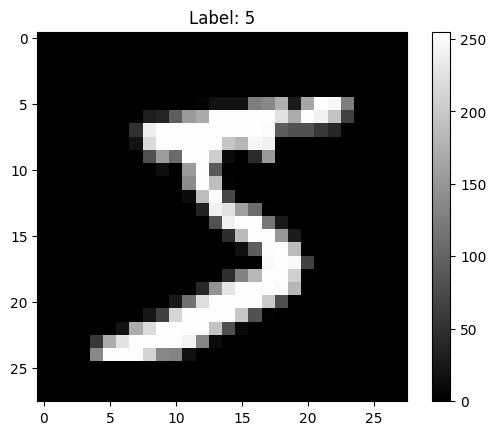

In [2]:
# Display the first image in the training set
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.title("Label: {}".format(train_labels[0]))
plt.show()

As you can see here, the data consists of images labeled with numbers. Each image is 28x28 pixels. Each pixel has a value ranging from 0 to 255, where low values (towards 0) correspond to darker areas (where nothing has been written), and high values (towards 255) correspond to lighter areas (where the digit has been written).

Before we use this data set, we must normalize the pixel values, so that rather than ranging between integer values of 0 and 255, the values range between floating point values of 0.0 and 1.0.

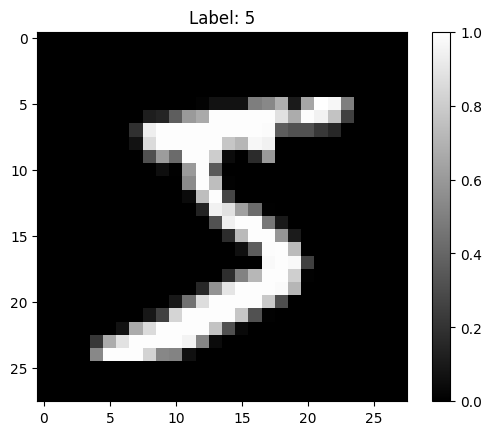

In [3]:
# Normalize the image data from [0, 255] to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the first image in the training set after normalization
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.title("Label: {}".format(train_labels[0]))
plt.show()

## Defining the MLP model

Now that we've imported and prepared the data, we can set up our neural network.

We start by defining a `Sequential` model. This is a type of model that is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. Here's what each line is doing:

1. `Flatten(input_shape=(28, 28))`: This line of code is adding a layer that will flatten the input data. The images in the MNIST dataset are 28x28 pixels, meaning that they are represented as 2D arrays. However, a fully connected layer expects a 1D array of features. So, this layer transforms the 2D array of pixels into a 1D array.

2. `Dense(16, activation='relu')`: This line of code is adding the first hidden layer of the model. It's a fully connected layer (also known as a "dense" layer), meaning that each neuron in this layer is connected to all neurons in the previous and next layers. The number 16 specifies the number of neurons in the layer. The activation function is set to 'relu', or Rectified Linear Unit, which is a simple function that allows the model to learn non-linear patterns.

3. `Dense(16, activation='relu')`: This is adding the second hidden layer, which is identical to the first.

4. `Dense(10, activation='softmax')`: This is adding the output layer of the model. There are 10 neurons, one for each class (digit) that the model can predict. The 'softmax' activation function is used because this is a multi-class classification problem. The softmax function outputs a probability distribution over the classes - the sum of the outputs of the neurons in this layer will be 1 for any given input.

After this block of code, the model's architecture is fully defined. But before training, the model needs to be compiled with an optimizer, a loss function, and a list of metrics, which is done using the `model.compile()` method.


In [4]:
# Define the MLP model
model = Sequential([
    # this layer converts the 28x28 image to a 1D array of 784 pixels
    Flatten(input_shape=(28, 28)),
    # first hidden layer with 16 neurons
    Dense(16, activation='relu'),
    # second hidden layer with 16 neurons
    Dense(16, activation='relu'),
    # output layer with 10 neurons (one for each class) using softmax activation
    Dense(10, activation='softmax')
])

## Compiling the MLP Model

With the architecture of the model defined, the next step is to compile the model. Compiling the model prepares it for training by configuring the learning process. This is done by specifying an optimizer, a loss function, and a list of metrics. Here's what each of the parameters to the `model.compile` method is doing:

- `optimizer='adam'`: The optimizer controls the learning rate. In this case, we are using 'adam', which adjusts the learning rate dynamically during training. It is a popular choice because it generally performs well.

- `loss='sparse_categorical_crossentropy'`: This is the loss function. A model's goal during training is to minimize the loss. 'Sparse categorical crossentropy' is a common choice for multi-class classification problems like ours. It's called "sparse" because we have integer targets.

- `metrics=['accuracy']`: This determines what metrics will be evaluated during training and testing. In this case, we are interested in the 'accuracy' metric, which will allow us to see the accuracy of our model on the training and validation data during the training process.

After compiling, our model is ready to start training on the dataset.

In [5]:
# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## Training the MLP Model

Now that the model has been compiled, we can start training it with our dataset. We accomplish this using the `model.fit()` method.

The `model.fit()` method adjusts the model parameters to minimize the loss: 

- The `train_images` and `train_labels` are the training data and the corresponding labels, respectively.

- `epochs=5` means that we'll go through the entire training dataset 5 times. An epoch is one pass through the entire training set. The number of epochs is a hyperparameter that determines how many times the learning algorithm will work through the entire training dataset. 

Training a model might take some time, depending on the complexity of the model, the number of epochs, the size of the training data, and the hardware you're using.

After training, our model should be ready to make predictions on unseen data.

In [10]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1564 - accuracy: 0.9543
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1479 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1424 - accuracy: 0.9581
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1351 - accuracy: 0.9603
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1309 - accuracy: 0.9613


## Evaluating the MLP Model

After training the model, we need to evaluate how well the model performs on unseen data, using the test set. We do this with the `model.evaluate()` function.

- `test_images` and `test_labels` are the test data and the corresponding labels, respectively. These data were not used during the training phase and provide a way to test the model's ability to generalize to new data.

- `verbose=2` is just a way of specifying how we want to 'see' the output during the evaluation. With `verbose=2`, the function will output the loss and metric values for each epoch.

The `model.evaluate()` function returns the loss and any metrics we asked for when we compiled the model. In this case, we asked for `accuracy`, so it's returned along with the loss as `test_loss` and `test_acc`, respectively. We then print the test accuracy.

This will tell us how accurately the model is able to identify the digit in an image from the test set.

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1655 - accuracy: 0.9540 - 889ms/epoch - 3ms/step

Test accuracy: 0.9539999961853027


## Demonstrating the Prediction Capabilities of the Model

After training and evaluating our model, it's useful to see it in action by making it predict the class of a single image from our test set.

We'll start by randomly selecting an image from our test set. We then display this image for reference. 

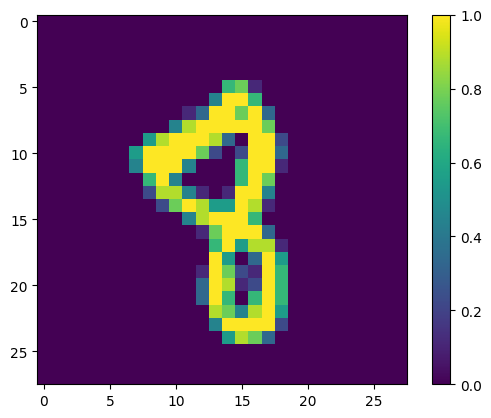

In [20]:
import numpy as np

# Select a random image from the test set
idx = np.random.randint(0, test_images.shape[0])

# Display the selected image
plt.figure()
plt.imshow(test_images[idx])
plt.colorbar()
plt.grid(False)
plt.show()

Next, we prepare the image to be input to our model. Even though we're only making a prediction on one image, our model expects a batch of images as input. So, we add an extra dimension to our image using `np.expand_dims`.

We then call `model.predict()` which returns a list of 10 probabilities, one for each class. The predicted class is the one with the highest probability. 

In [21]:
# Predict the class of the image
image = (np.expand_dims(test_images[idx],0))  # our model expects a batch of images as input, so we add an extra dimension
predictions = model.predict(image)
predicted_class = np.argmax(predictions[0])  # the prediction for the image is the class with the highest probability

print(f'The model predicts this digit is a: {predicted_class}')

1/1 [==============================] - 0s 16ms/step
The model predicts this digit is a: 8
